# How reliable is the cement's quality
![image](cement_pic.jpg)

## Introduction:
Cement is the most widely used material in existence and only behind water in the list of most consumed materials. Such massive is its application. It would not too far to say that nearly all the civil work relies on the endurance, binding, and support provided by the cement. Therefore, ensuring its quality is a major issue. 



### Data Dictionary

The feature set includes

|Feature|Details|
|:------|:------|
|Cement| Cement (kg in a m3 mixture)|
|Blast Furnace Slag| Slag Produced in Blast Furnace (kg in a m3 mixture)|
|Fly Ash| Amount of ash produced (kg in a m3 mixture)|
|Water| Amount of water required (kg in a m3 mixture)|
|Super-plasticizer| rigidity of cement after drying (kg in a m3 mixture)|
|Coarse Aggregate| The coarse nature of the cement particles (kg in a m3 mixture)|
|Fine Aggregate| Fineness of the cement (kg in a m3 mixture)|
|Age| Age or time before it needs repairing (in days)|
|**Strength**| Strength of concrete (/kN) per kiloNewton|

## Data Resorces:
The data is available on Kaggle. Kindly visit [link](https://www.kaggle.com/datasets/maajdl/yeh-concret-data) and [another link](https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking) to download the dataset

## Goal:
My objective is to demonstrate that contractors, house owners, builders and other stake holders could be provided a tool that is easy to be used and help them in assessing the quality of cement in the simplest way.

The target is to predict the strength of the cement.

---

In [49]:
# Importing  libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

# Importing ML Libs
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split, KFold
from sklearn.linear_model import LinearRegression 
from sklearn.svm import LinearSVR             
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import pickle

In [2]:
# Managing view settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

---
## Reading in the dataset

In [3]:
# Loading the dataset
data = pd.read_csv('concrete_data.csv')

# Peek
data.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

- The data consists of 9 features and 1030 samples

---
## Data Analysis

In [4]:
# Checking for Duplicates
data.duplicated().sum()

25

In [5]:
# Dropping Duplicates
data = data.drop_duplicates().reset_index(drop=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1005 non-null   float64
 1   Blast Furnace Slag  1005 non-null   float64
 2   Fly Ash             1005 non-null   float64
 3   Water               1005 non-null   float64
 4   Superplasticizer    1005 non-null   float64
 5   Coarse Aggregate    1005 non-null   float64
 6   Fine Aggregate      1005 non-null   float64
 7   Age                 1005 non-null   int64  
 8   Strength            1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 70.8 KB


- Nearly all the columns are in numeric form. 
- Apparently, no Null values are seen. 

In [7]:
data.describe().T

count        mean         std     min     25%    50%  \
Cement              1005.0  278.631343  104.344261  102.00  190.70  265.0   
Blast Furnace Slag  1005.0   72.043483   86.170807    0.00    0.00   20.0   
Fly Ash             1005.0   55.536318   64.207969    0.00    0.00    0.0   
Water               1005.0  182.075323   21.339334  121.80  166.60  185.7   
Superplasticizer    1005.0    6.033234    5.919967    0.00    0.00    6.1   
Coarse Aggregate    1005.0  974.376816   77.579667  801.00  932.00  968.0   
Fine Aggregate      1005.0  772.688259   80.340435  594.00  724.30  780.0   
Age                 1005.0   45.856716   63.734692    1.00    7.00   28.0   
Strength            1005.0   35.250378   16.284815    2.33   23.52   33.8   

                        75%     max  
Cement               349.00   540.0  
Blast Furnace Slag   142.50   359.4  
Fly Ash              118.30   200.1  
Water                192.90   247.0  
Superplasticizer      10.00    32.2  
Coarse Aggregate    1031.00  1145.0  
Fine Aggregate       822.20   992.6  
Age                   56.00   365.0  
Strength              44.87    82.6

- It is obvious that our data is spread on various scales

In [8]:
data.nunique()

Cement                278
Blast Furnace Slag    185
Fly Ash               156
Water                 195
Superplasticizer      111
Coarse Aggregate      284
Fine Aggregate        302
Age                    14
Strength              845
dtype: int64

- The least number of unique values is 14, and its contender column is `Age`

In [9]:
for col in data.columns:
    nunique = data[col].nunique()
    nu_percent = nunique / data.shape[0]*100
    print(col,'-->',  nu_percent)

Cement --> 27.66169154228856
Blast Furnace Slag --> 18.407960199004975
Fly Ash --> 15.522388059701491
Water --> 19.402985074626866
Superplasticizer --> 11.044776119402986
Coarse Aggregate --> 28.258706467661693
Fine Aggregate --> 30.049751243781092
Age --> 1.3930348258706469
Strength --> 84.07960199004975


- Minimum *nu_percent* or Percentage presence of uniqueness is seen in `Age`

---
## Data Visualizations 

<Figure size 1000x1000 with 0 Axes>

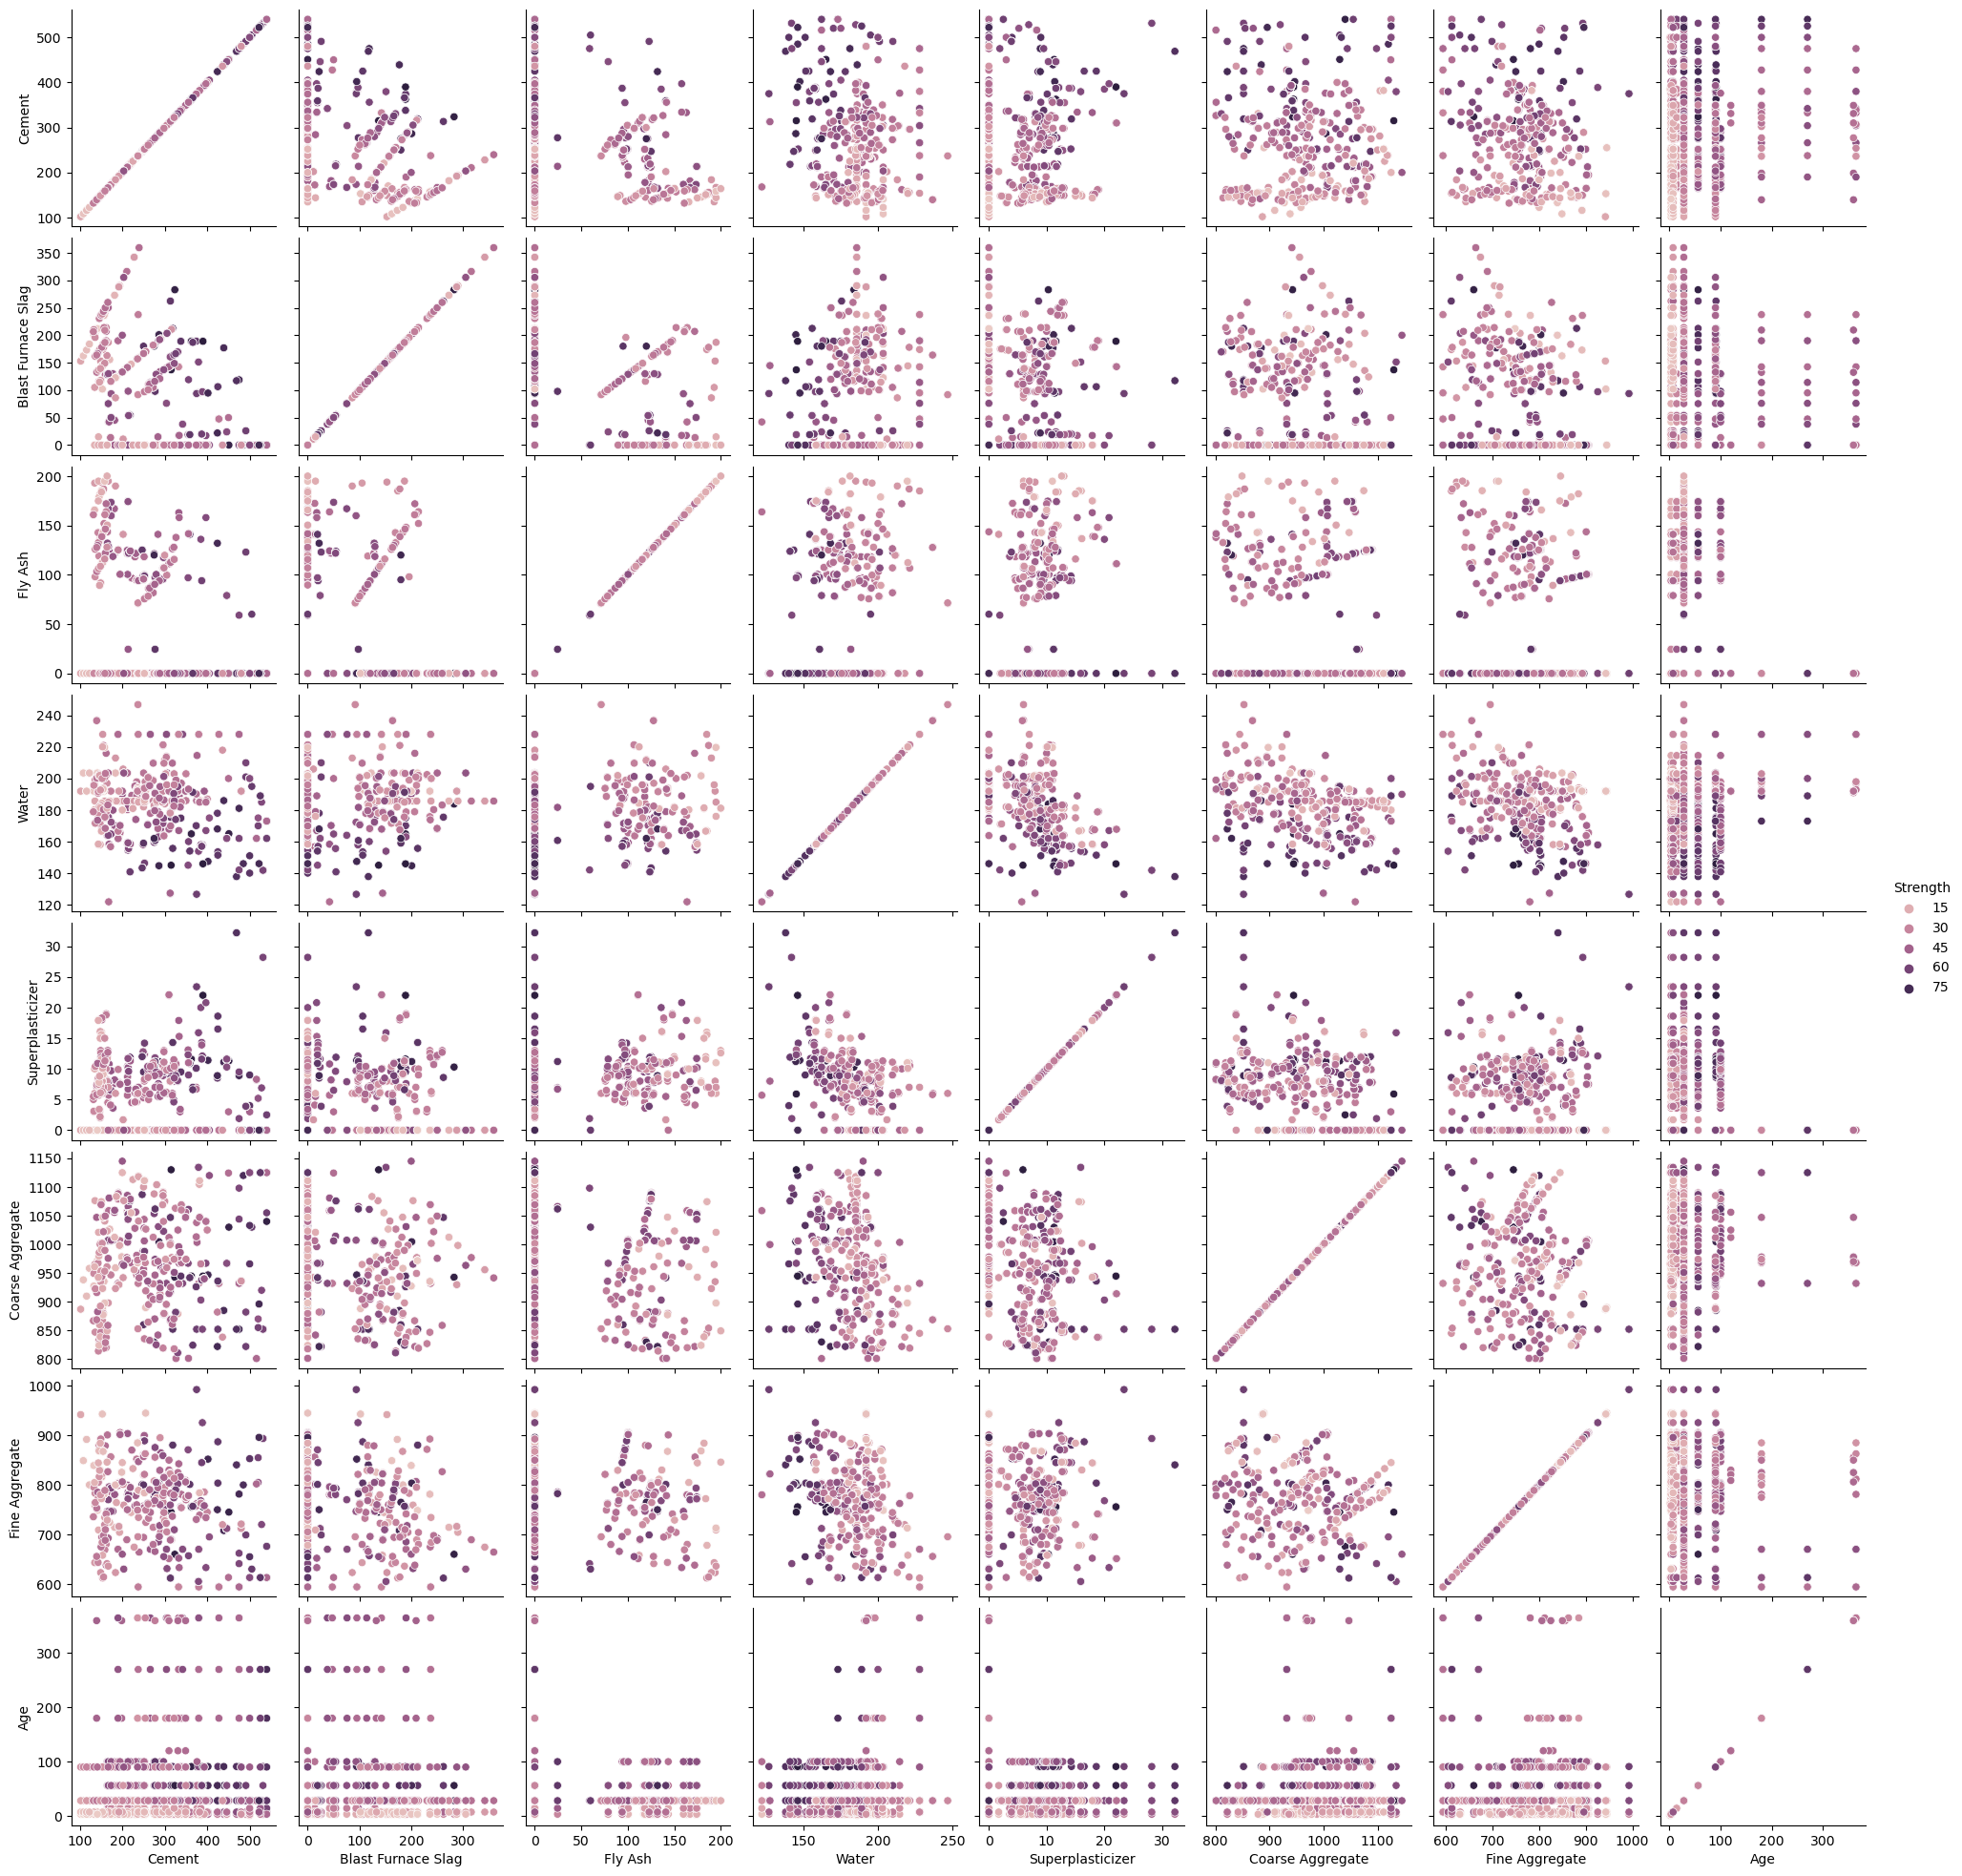

In [10]:
# Checking the Distributions 
plt.figure(figsize=(10,10))
sns.pairplot(data, 
             kind='scatter', 
             diag_kind=None, 
             hue='Strength')
plt.show()

<Figure size 1000x1000 with 0 Axes>

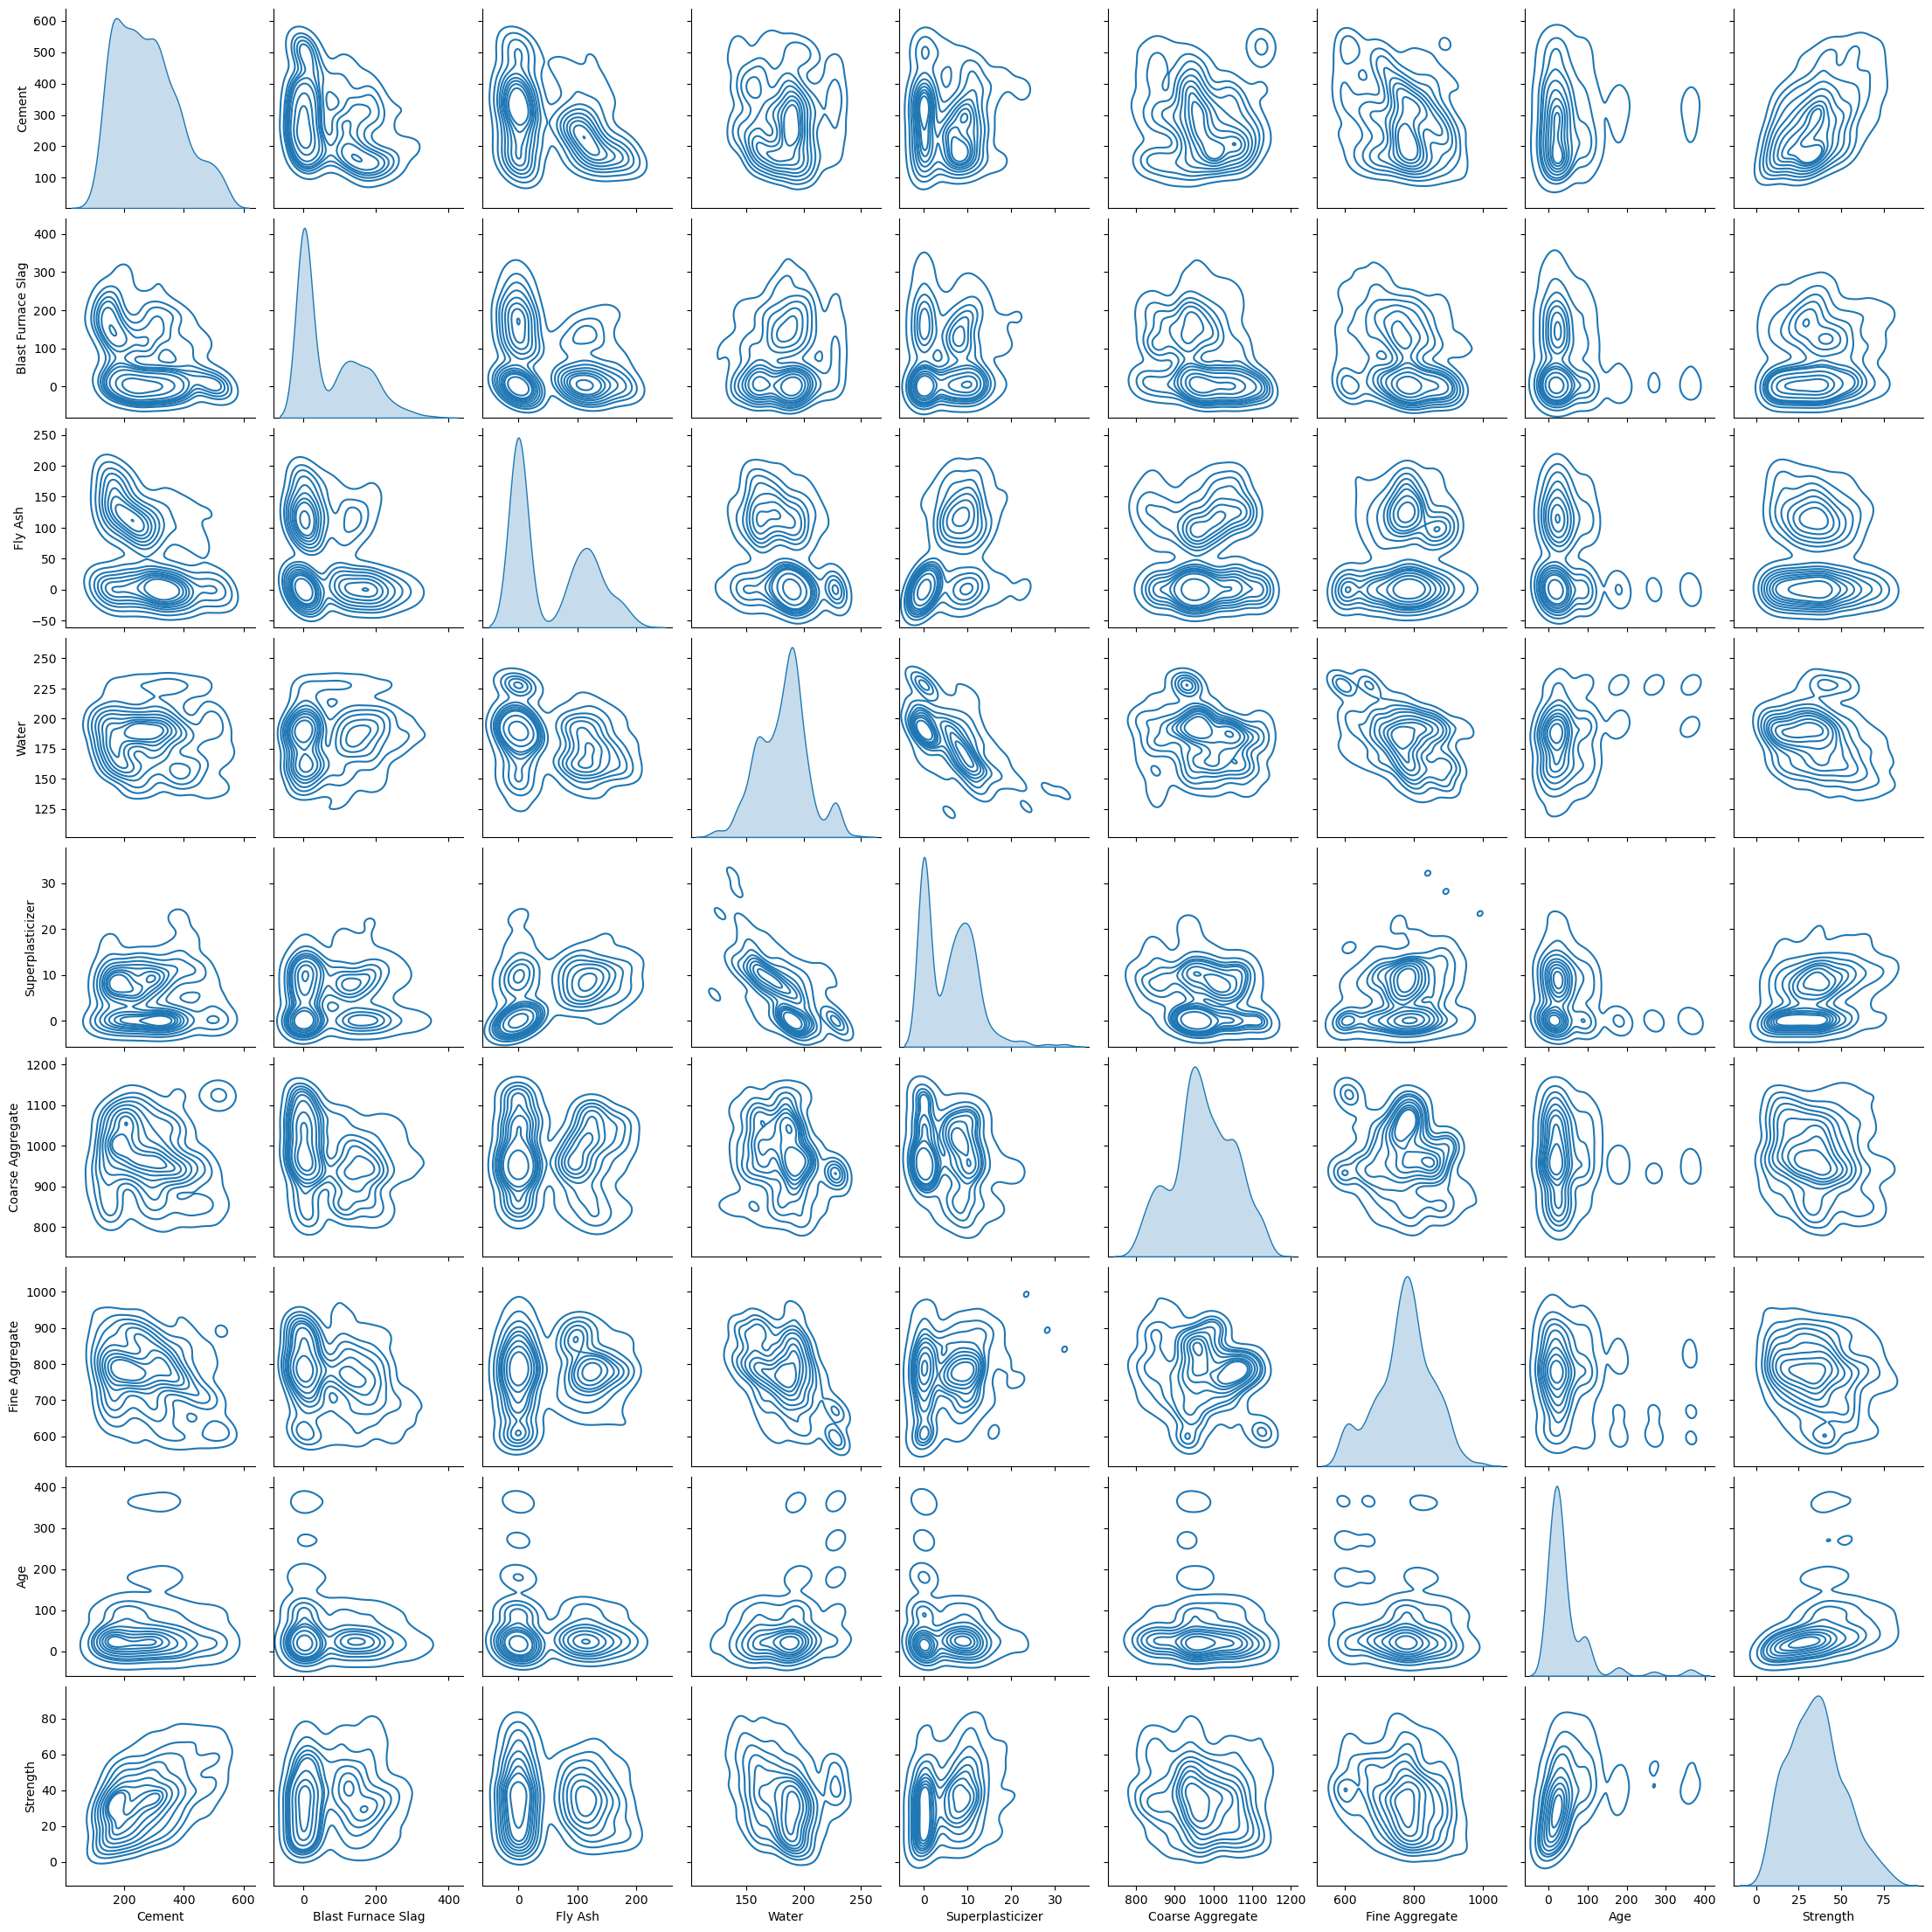

In [11]:
# Checking the Distributions 
plt.figure(figsize=(10,10))
sns.pairplot(data, 
             kind='kde')
plt.show()

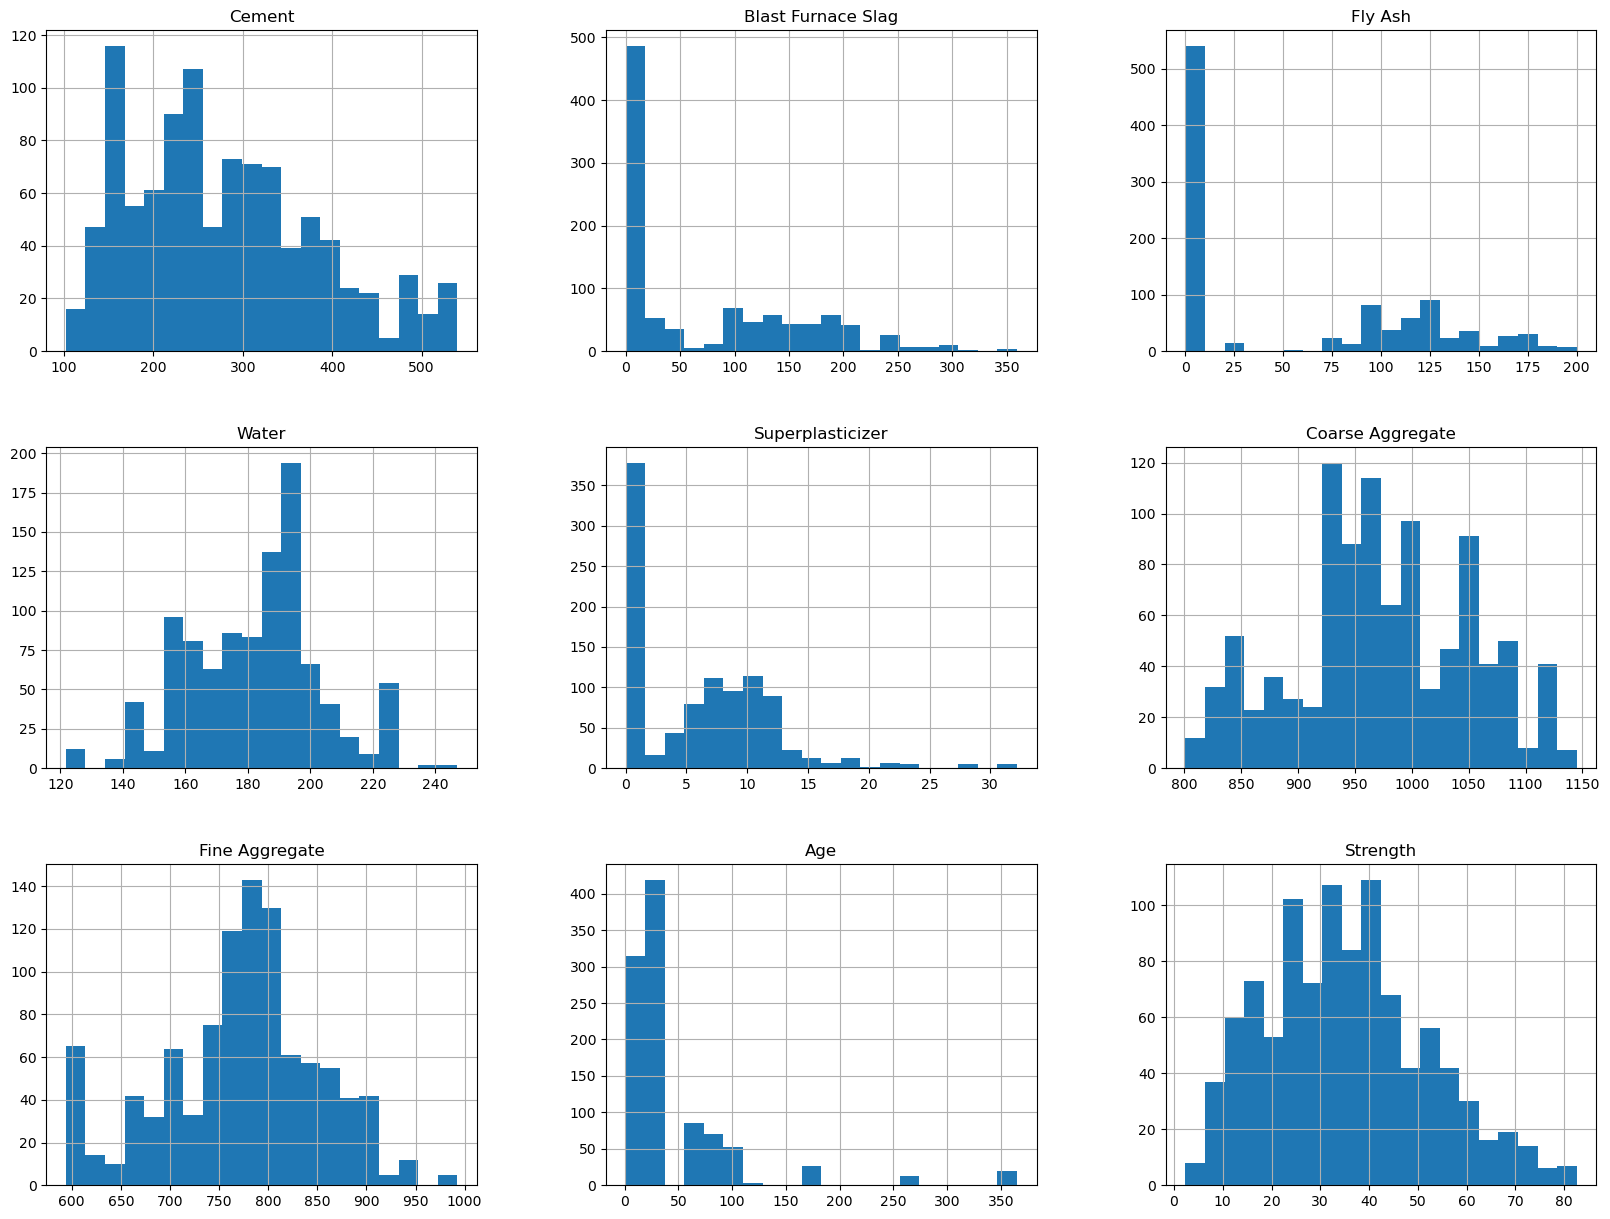

In [12]:
data.hist(bins=20, 
          figsize=(20,15))
plt.show()

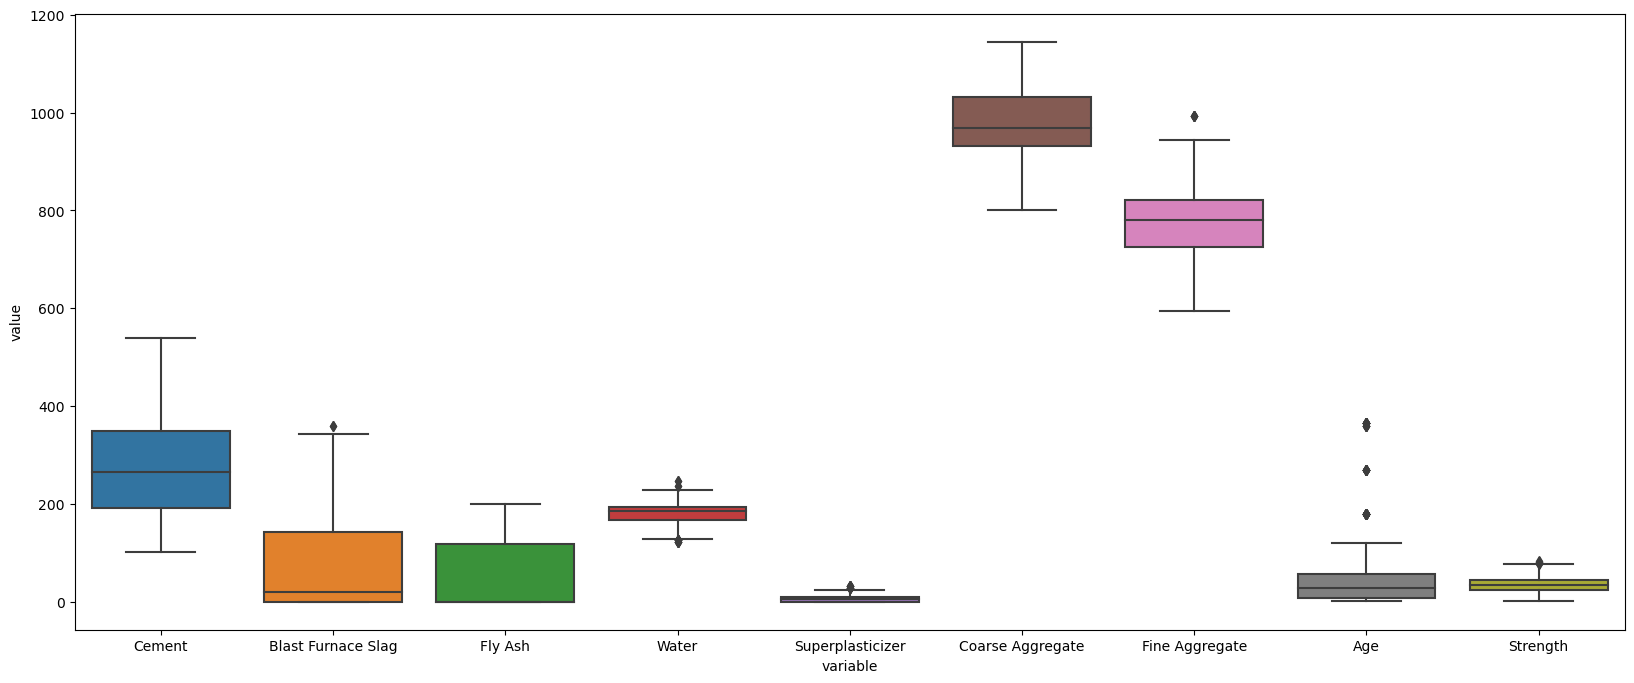

In [13]:
# Melting Dataframe 
data_melted = data.melt()

# Figure
plt.figure(figsize=(20,8))
sns.boxplot(x='variable', 
            y='value', 
            data=data_melted)
plt.show()

<Figure size 200x300 with 0 Axes>

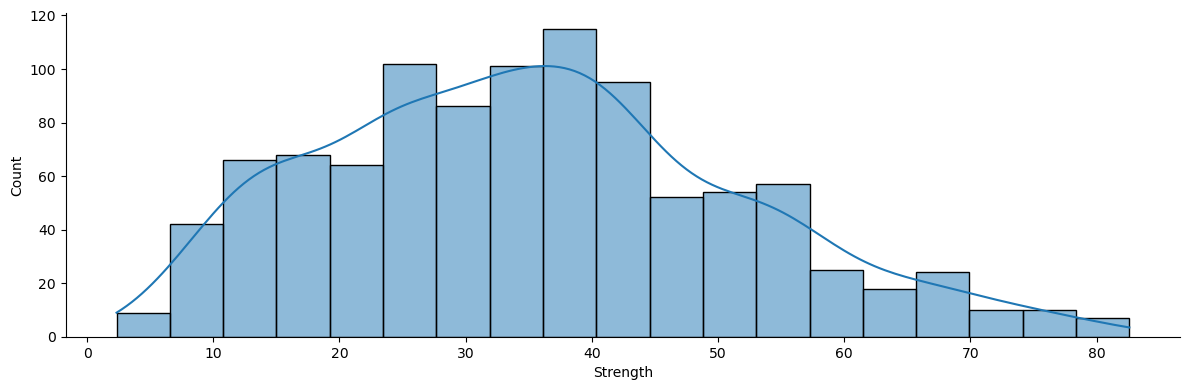

In [14]:
# The Target Variable
plt.figure(figsize=(2,3))
sns.displot(data, x='Strength', kde=True, height=4, aspect=3)
plt.show()

---
## Data Cleaning and Processing

In [16]:
def outliers(data, col, thresh=3):
    mean, std = data[col].mean(), data[col].std()
    cutoff = std*thresh
    lower, upper = mean - cutoff, mean+cutoff
    outliers = [val for val in data[col] if val < lower or val > upper]
    return outliers

In [18]:
[len(outliers(data, col)) for col in data.columns]

[0, 4, 0, 2, 10, 0, 0, 33, 0]

- The above list comprehension shows the number of outliers across all the columns

In [19]:
print('Before removal of Outliers:', data.shape[0])

# Making a copy of data
data1 = data.copy()
my_outliers = []
# Collecting indices
for col in data1.columns:
    # Collecting indices for each column
    outlying_items = outliers(data1, col)
    indices = data1[data1[col].isin(outlying_items)].index.tolist()
    # Appending all these in my_ouliers list
    for item in indices:
        my_outliers.append(item)
print('After removal of these: ', data1.shape[0] - len(set(my_outliers)))

Before removal of Outliers: 1005
After removal of these:  956


In [20]:
# Making sure that there are no duplicates
my_outliers = list(set(my_outliers))
len(my_outliers)

49

In [21]:
data1 = data1.drop(my_outliers, axis=0)
data1.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
5   266.0               114.0      0.0  228.0               0.0   
7   380.0                95.0      0.0  228.0               0.0   
8   266.0               114.0      0.0  228.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
5             932.0           670.0   90     47.03  
7             932.0           594.0   28     36.45  
8             932.0           670.0   28     45.85

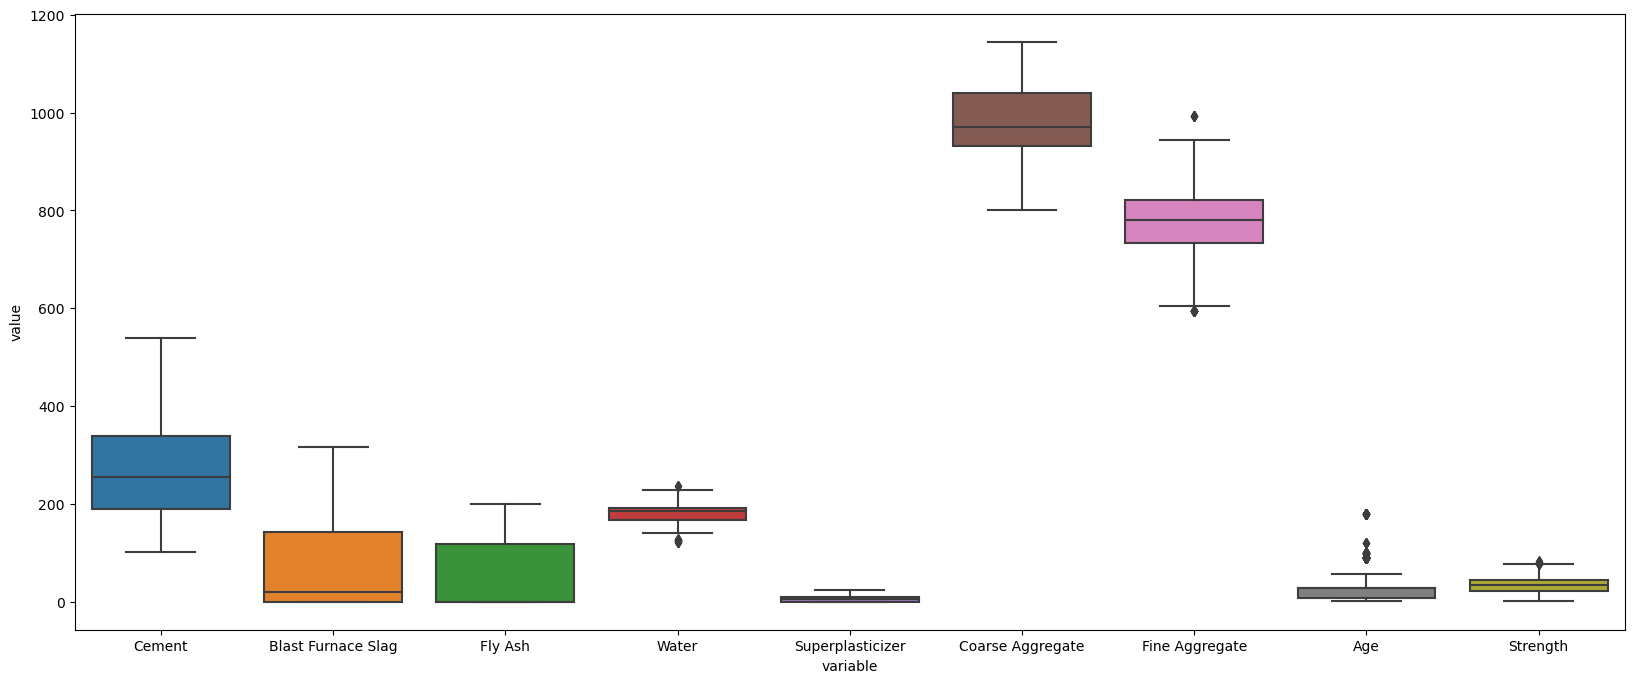

In [22]:
# Rechecking the outliers

# Melting Dataframe 
data1_melted = data1.melt()

# Figure
plt.figure(figsize=(20,8))
sns.boxplot(x='variable', 
            y='value', 
            data=data1_melted)
plt.show()

- It seems to have improved. Too aggressive approach will lead to data shortage

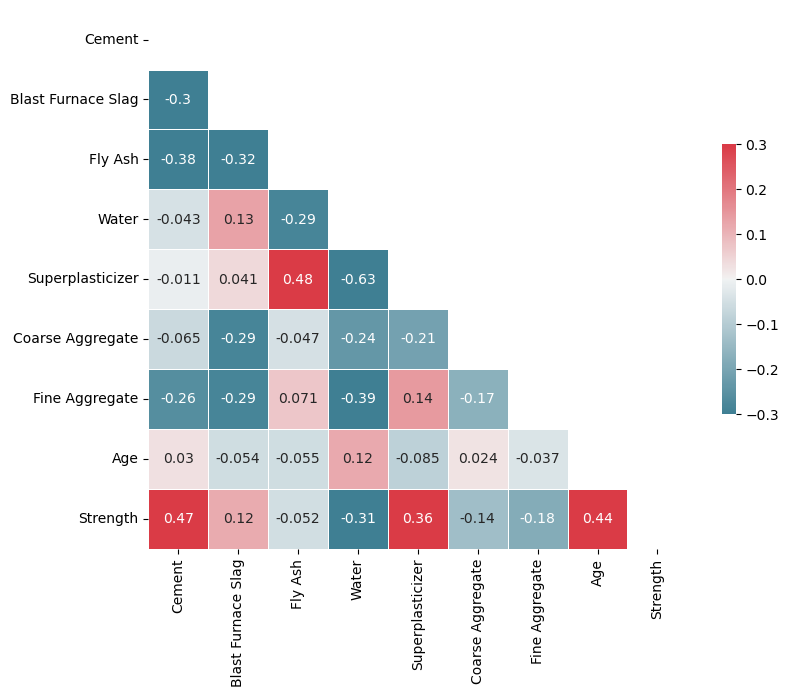

In [31]:
# Generate a mask for the upper triangle
mask = np.zeros_like(data1.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    data1.corr(),
    mask=mask, 
    cmap=cmap,
    annot=True,
    vmax=.3,
    vmin=-.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)
plt.show()

In [32]:
def vif_check(data):

    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data['column'] = data.columns

    # calculating VIF for each feature
    vif_data['VIF'] = [variance_inflation_factor(data.values, i)
                              for i in range(len(data.columns))]

    print(vif_data)

In [33]:
# Check VIF
vif_check(data1)

               column        VIF
0              Cement  28.541862
1  Blast Furnace Slag   4.781639
2             Fly Ash   5.157885
3               Water  98.836608
4    Superplasticizer   5.871406
5    Coarse Aggregate  84.175730
6      Fine Aggregate  74.015451
7                 Age   3.596024
8            Strength  18.150063


In [34]:
# Trial and Error. 
vif_check(data1.drop(['Water', 'Coarse Aggregate'], axis=1))

               column        VIF
0              Cement  16.372101
1  Blast Furnace Slag   2.580139
2             Fly Ash   3.501042
3    Superplasticizer   4.084746
4      Fine Aggregate  15.413437
5                 Age   3.154639
6            Strength  15.653510


In [35]:
# Drop columns
data2 = data1.drop(['Water', 'Coarse Aggregate'], axis=1)

In [36]:
data2.head()

Cement  Blast Furnace Slag  Fly Ash  Superplasticizer  Fine Aggregate  Age  \
0   540.0                 0.0      0.0               2.5           676.0   28   
1   540.0                 0.0      0.0               2.5           676.0   28   
5   266.0               114.0      0.0               0.0           670.0   90   
7   380.0                95.0      0.0               0.0           594.0   28   
8   266.0               114.0      0.0               0.0           670.0   28   

   Strength  
0     79.99  
1     61.89  
5     47.03  
7     36.45  
8     45.85

---
## Data Transformation

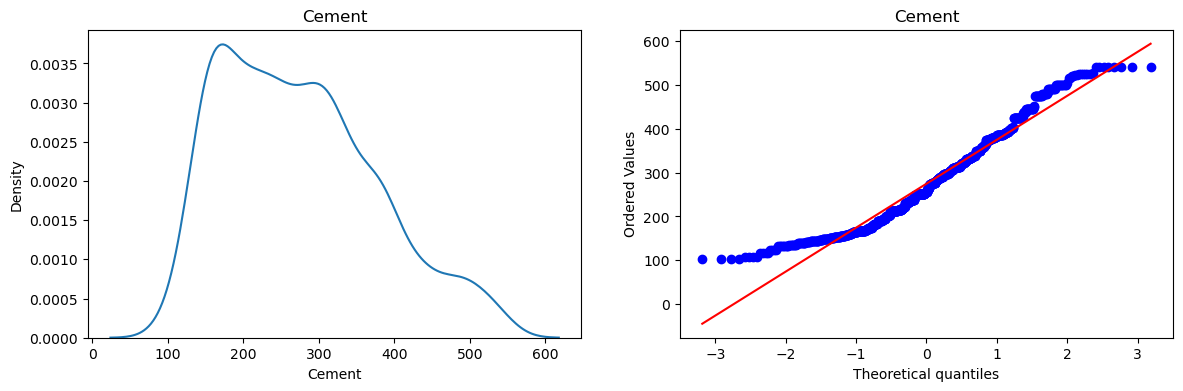

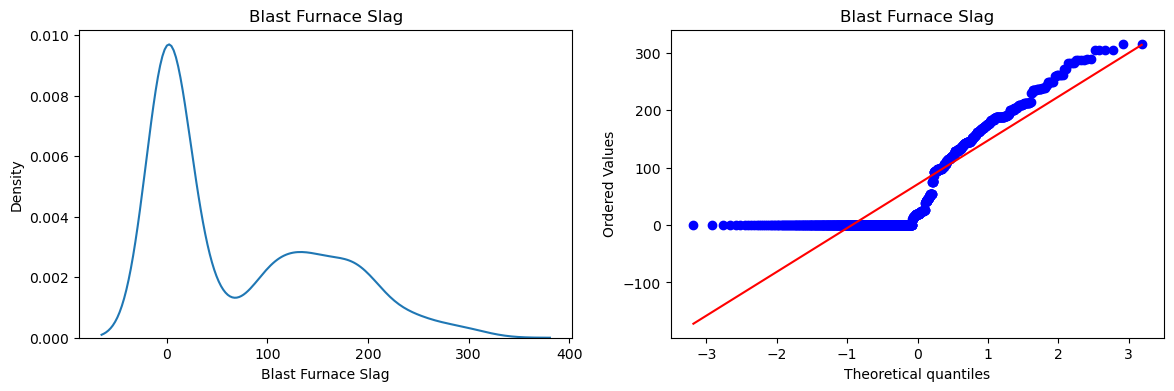

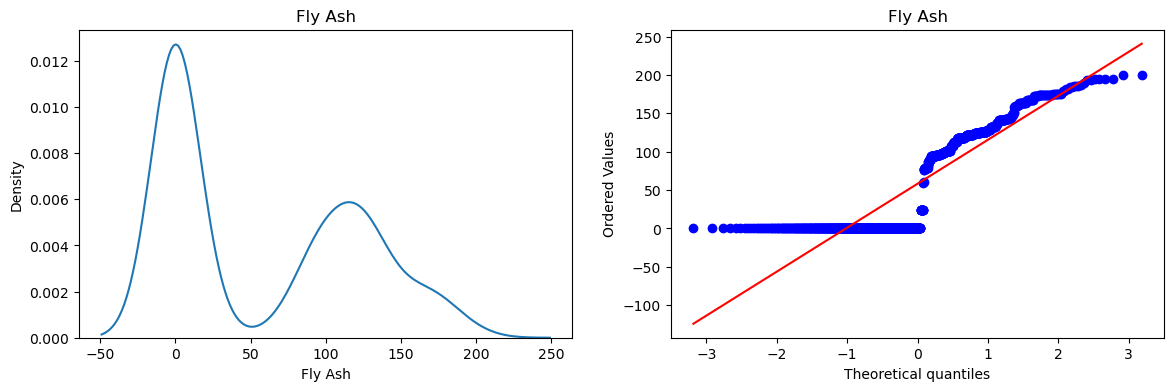

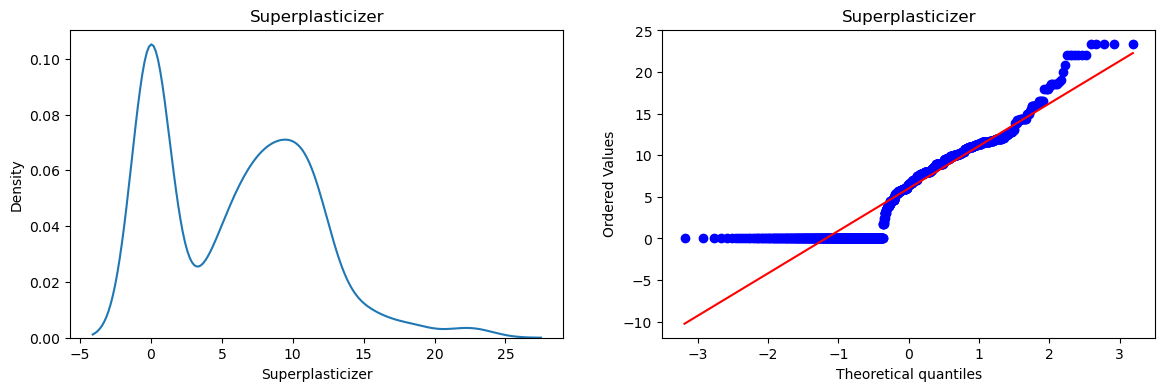

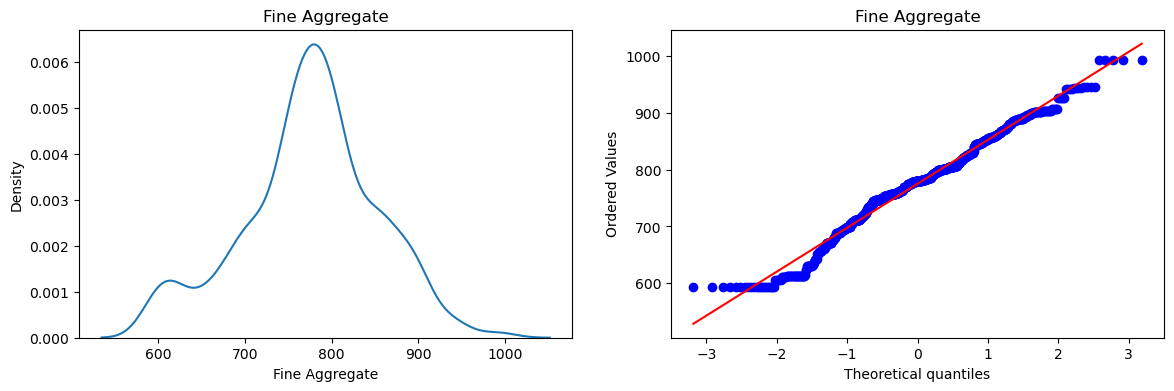

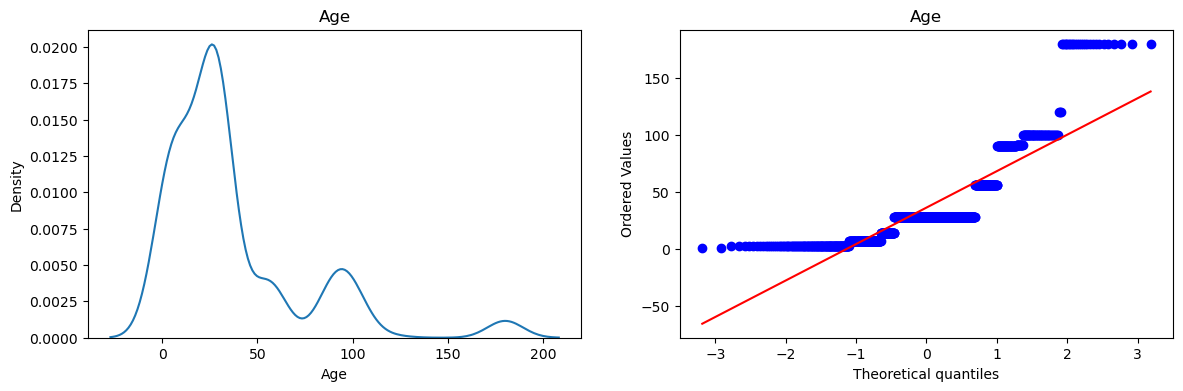

In [37]:
for col in data2.drop('Strength', axis=1).columns:
    fig, axes = plt.subplots(1, 2, figsize = (14,4))
    sns.kdeplot(data2[col], ax=axes[0])
    axes[0].set_title(col)
    
    stats.probplot(data2[col], 
                   dist='norm', 
                   plot=plt)
    plt.title(col)
    
    plt.show()

In [38]:
# Features
X = data2.drop('Strength', axis=1)

# Target
y = data2['Strength']

In [39]:
# Splitting Features, and Targets further into train, and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [40]:
# Instantiating Transformer
pt = PowerTransformer(method='box-cox')

# Fitting and Transforming X_train
X_train_transformed = pt.fit_transform(X_train + 0.000001) # To make vals > 0
# Only Fitting on X_test
X_test_transformed = pt.transform(X_test + 0.000001) 

pd.DataFrame({'cols':X_train.columns , 
              'box-cox_lambdas': pt.lambdas_})


cols  box-cox_lambdas
0              Cement         0.087900
1  Blast Furnace Slag         0.013885
2             Fly Ash        -0.004577
3    Superplasticizer         0.108038
4      Fine Aggregate         1.589083
5                 Age         0.172706

In [41]:
X_train_transformed.shape

(764, 6)

In [42]:
# Convert to DataFrames
X_train_transformed = pd.DataFrame(X_train_transformed, 
                                   columns=X_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed,
                                  columns = X_test.columns)

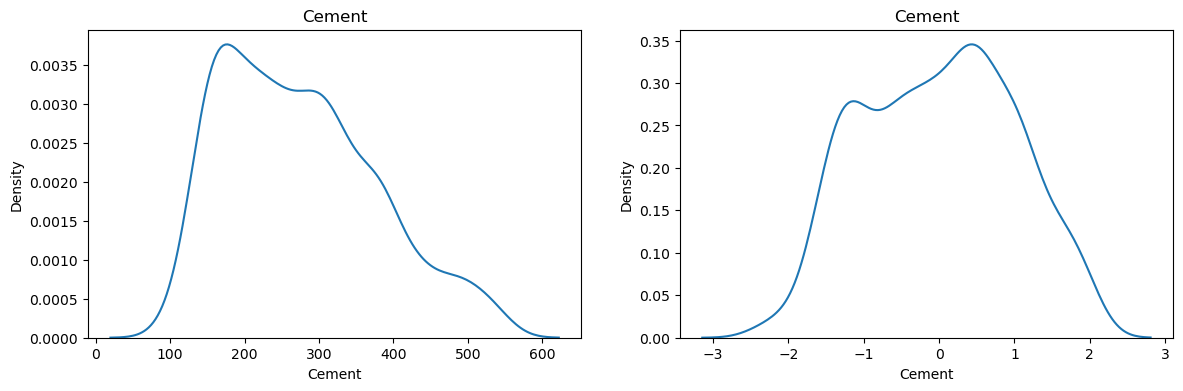

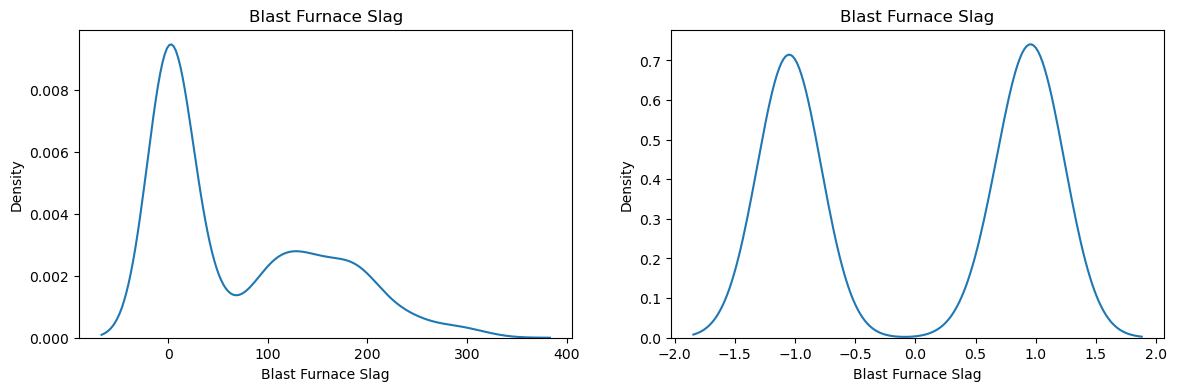

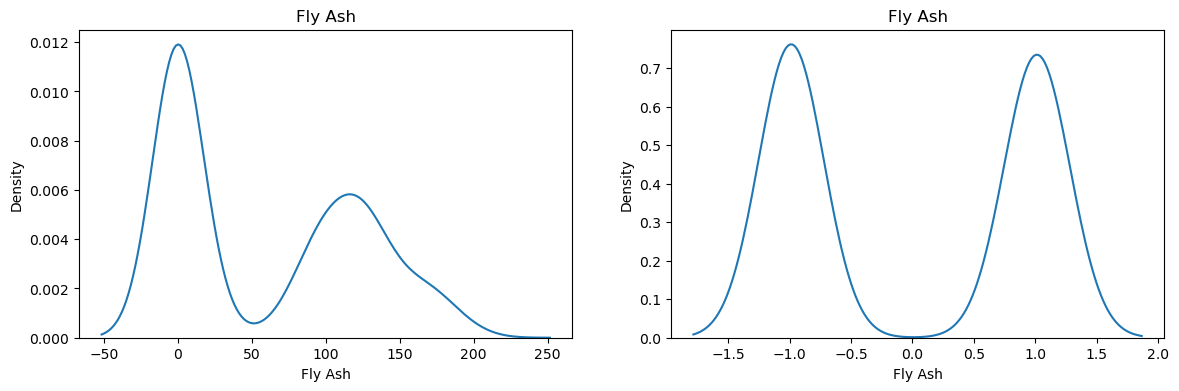

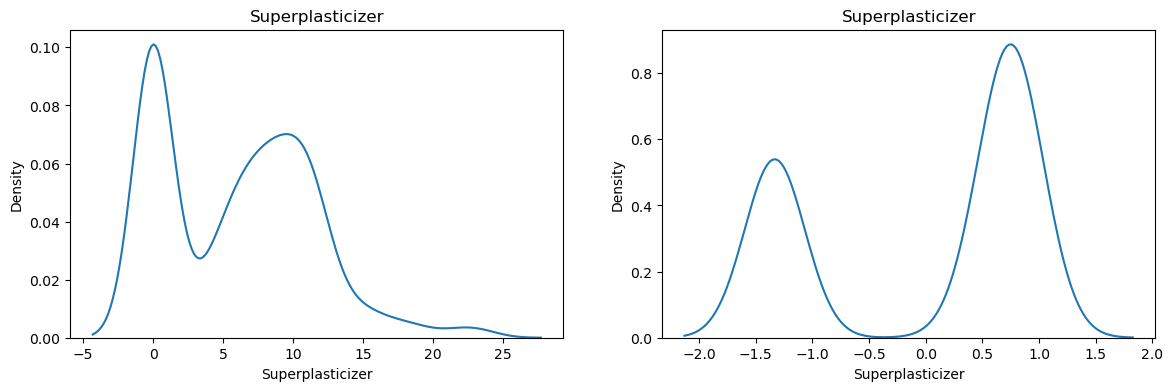

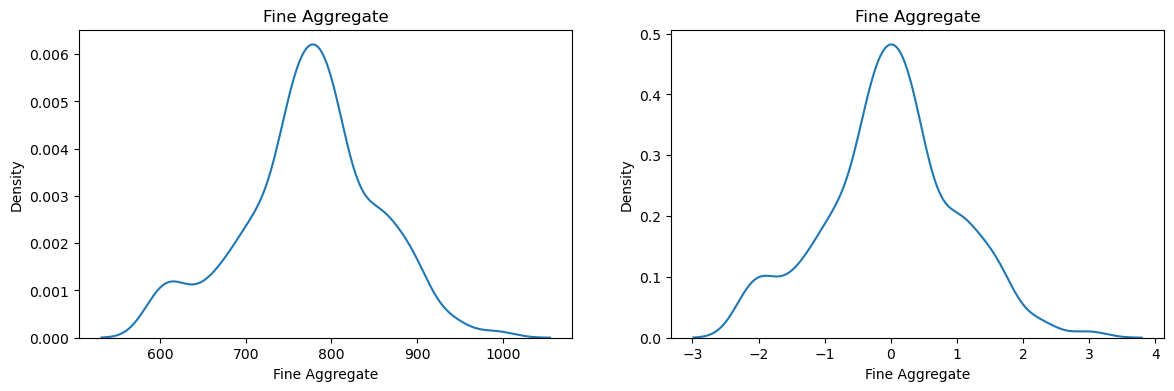

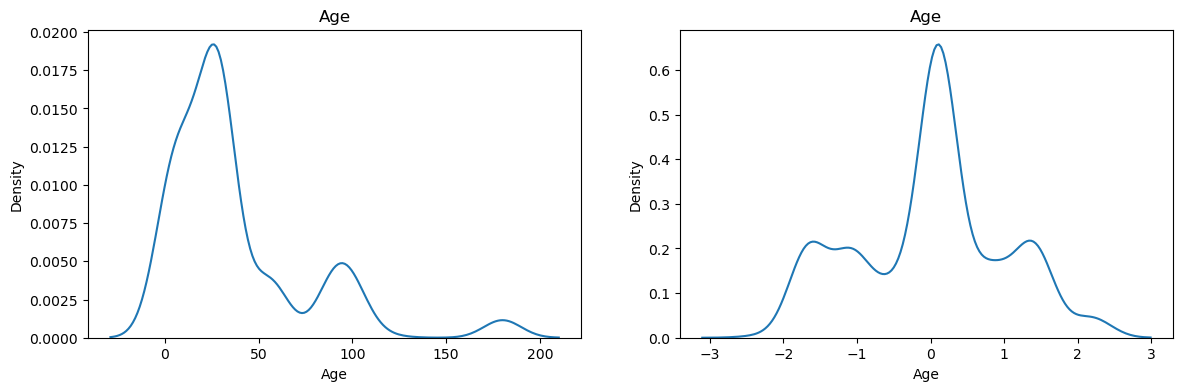

In [43]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.kdeplot(X_train_transformed[col])
    plt.title(col)
    plt.show()

---
## Building Models

In [44]:
models = []

# Appending multiple algorithms in a list
models.append(('linear_regression', LinearRegression()))
models.append(('knn_regressor', KNeighborsRegressor()))
models.append(('decisiontrees_regressor', DecisionTreeRegressor()))
models.append(('randomforest_regressor', RandomForestRegressor()))
models.append(('svr', LinearSVR(dual=False, loss='squared_epsilon_insensitive')))

In [45]:
X = X.replace(0, 0.0000001)

LINEAR_REGRESSION r2 score is 0.6603, and MAE is 7.4182


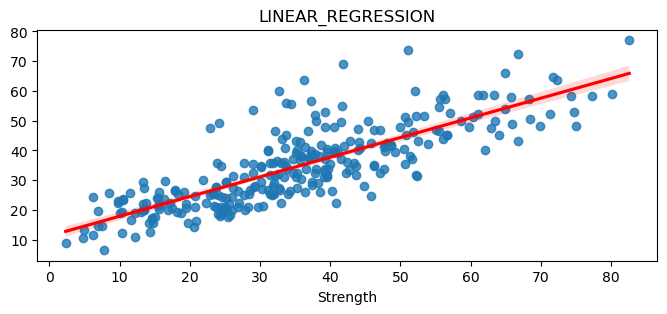

------------------------------------------------------------------------------------------
KNN_REGRESSOR r2 score is 0.692, and MAE is 6.9792


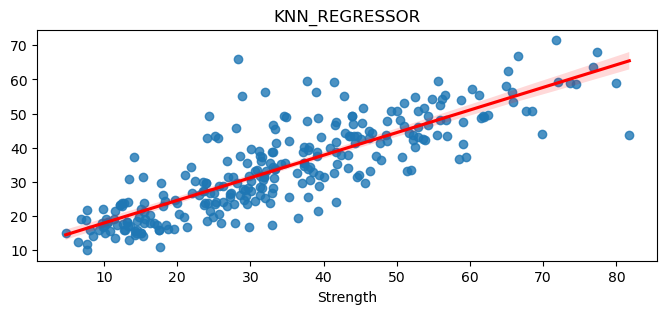

------------------------------------------------------------------------------------------
DECISIONTREES_REGRESSOR r2 score is 0.8483, and MAE is 4.6663


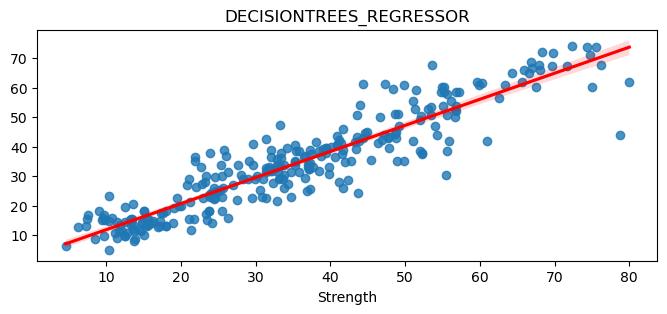

------------------------------------------------------------------------------------------
RANDOMFOREST_REGRESSOR r2 score is 0.8643, and MAE is 4.0795


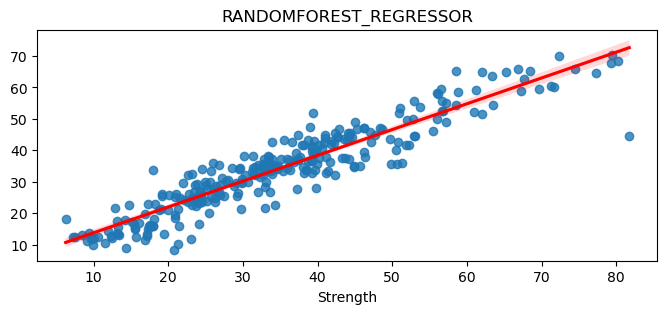

------------------------------------------------------------------------------------------
SVR r2 score is 0.6216, and MAE is 7.7887


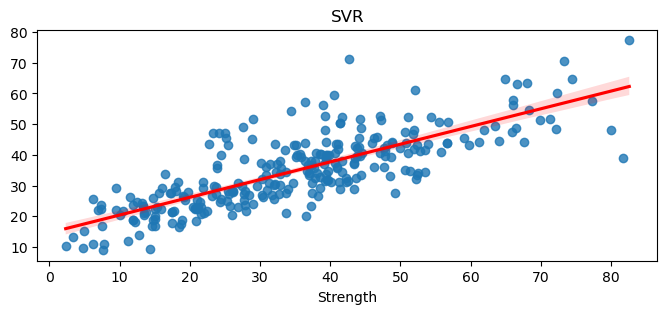

------------------------------------------------------------------------------------------


In [46]:
for name, model in models:
    steps = list()
    steps.append(('ptransformer', PowerTransformer(method='box-cox')))
    steps.append((name, model))
    pipeline = Pipeline(steps=steps)
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size=0.3)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print('{} r2 score is {}, and MAE is {}'.format(str(name).upper(), round(r2,4), round(mae, 4)))
    plt.figure(figsize=(8,3))
    sns.regplot(x=y_test, 
                y=y_pred, 
                line_kws={"color": "red"})
    plt.title(str(name).upper())
    
    plt.show()
    print('-'*90)
    
    
    
    
    
    

In [55]:
for name, model in models:
    steps = list()
    steps.append(('ptransformer', PowerTransformer(method='box-cox')))
    steps.append((name, model))
    pipeline = Pipeline(steps=steps)
    
    # define the evaluation procedure
    cv = KFold(n_splits=10, 
               random_state=1, 
               shuffle=True)
    # evaluate the model using cross-validation
    scores = cross_validate(pipeline, 
                            X, 
                            y, 
                            scoring=['r2', 'neg_mean_absolute_error'], 
                            cv=cv, 
                            n_jobs=-1)
    # report performance
    print(str(name).upper()+':')
    print('Average R2 test score: ', scores['test_r2'].mean())
    print('Average MAE test score: ', np.mean([abs(s) for s in scores['test_neg_mean_absolute_error']]))
    print('-'*45)

LINEAR_REGRESSION:
Average R2 test score:  0.7543173483568233
Average MAE test score:  6.070393238512979
---------------------------------------------
KNN_REGRESSOR:
Average R2 test score:  0.7786210036820733
Average MAE test score:  5.518646929824561
---------------------------------------------
DECISIONTREES_REGRESSOR:
Average R2 test score:  0.8293814256144495
Average MAE test score:  4.245053490497075
---------------------------------------------
RANDOMFOREST_REGRESSOR:
Average R2 test score:  0.8922584517595615
Average MAE test score:  3.7102178662393834
---------------------------------------------
SVR:
Average R2 test score:  0.7543244641505144
Average MAE test score:  6.069234045996888
---------------------------------------------


- Random Forests Regressor seems to have the best performance

### Hyper Parameter Optimization

In [59]:
my_steps = list()
my_steps.append(('pt_transformer', PowerTransformer(method='box-cox')))
my_steps.append(('model', RandomForestRegressor(random_state=1)))
pipeline = Pipeline(steps=steps)

cv = KFold(n_splits=10, 
           random_state=1, 
           shuffle=True)
# evaluate the model using cross-validation
scores = cross_validate(pipeline, 
                        X, 
                        y, 
                        scoring=['r2', 'neg_mean_absolute_error'], 
                        cv=cv, 
                        n_jobs=-1)

print('Average R2 test score: ', scores['test_r2'].mean())
print('Average MAE test score: ', np.mean([abs(s) for s in scores['test_neg_mean_absolute_error']]))

Average R2 test score:  0.7543244641505144
Average MAE test score:  6.069234045996888


In [60]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [61]:
steps = list()
steps.append(('ptransformer', PowerTransformer(method='box-cox')))
steps.append(('model', RandomForestRegressor()))
pipe = Pipeline(steps=steps)

In [108]:
parameters= {'model__max_depth' : [None, 5, 10],
             'model__max_leaf_nodes': [None, 5, 10, 50, 100],
             'model__max_samples': [None, 10, 20, 50, 100], 
             'model__min_samples_leaf': np.arange(1,10),
             'model__min_samples_split': np.arange(2,10)}

In [109]:
grid = GridSearchCV(estimator = pipe,       
                           param_grid = parameters,          
                           cv = KFold(n_splits=10, random_state=1, shuffle=True),
                           scoring='r2',                     
                           n_jobs = -1,
                           verbose=3)    

In [110]:
grid.fit(X, y)

Fitting 10 folds for each of 5400 candidates, totalling 54000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('ptransformer',
                                        PowerTransformer(method='box-cox')),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 5, 10],
                         'model__max_leaf_nodes': [None, 5, 10, 50, 100],
                         'model__max_samples': [None, 10, 20, 50, 100],
                         'model__min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='r2', verbose=3)

In [111]:
print(grid.best_params_)

{'model__max_depth': None, 'model__max_leaf_nodes': None, 'model__max_samples': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 3}


In [112]:
print(grid.best_estimator_)

Pipeline(steps=[('ptransformer', PowerTransformer(method='box-cox')),
                ('model', RandomForestRegressor(min_samples_split=3))])


In [113]:
print(grid.best_score_)

0.8897200833445267


In [114]:
# saving the model
pickle.dump(model, open('model.pkl', 'wb'))

---